In [66]:
import pandas as pd
import numpy as np
import logging
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import sys
sys.path.insert(1, '../')

from config import shuffled_csv
from NN import NN_model, ReLU, Sigmoid, MSE, L1_reg, L2_reg
from NN.utility import batch_train, batch_out, Model_Wrapper

from LevelMethod import LevelMethod, LevelMethod2d, TestFunction

data = pd.read_csv(shuffled_csv, index_col=0).to_numpy()
data = data[:100,:]
n_samples = data.shape[0]
X_data = data[:, :10]
Y_data = data[:, 10:]

Y_scaler = StandardScaler()
Y_scaled = Y_scaler.fit_transform(Y_data)

np.random.seed()
model = NN_model([10, 20, 20, 2], ReLU, MSE)

reg_loss = L1_reg(1e-4)
f = Model_Wrapper(model, X_data, Y_scaled, reg_loss)

lp_methods = ["ECOS", "GLPK", "MOSEK"]
lp_results = {m:[] for m in lp_methods}
    
qp_methods = [None, "MOSEK"]
qp_results = {str(m):[] for m in qp_results}

In [9]:
# Run experiments

for method in lp_methods:
    print(f"Testing method {method}")
    model.init_weights()
    
    solver = LevelMethod(bounds=1, lambda_=0.7, epsilon=0.01, max_iter=100, memory=None, LP_solver=method)
    x = model.Weights
    status = solver.solve(f,x)
    model.Weights = solver.x_upstar
    
    times = solver.times
    results[method].append(times["LP"][1:])

results_list.append(results)

00
 9: -7.3322e+01 -3.0182e+02  2e+02  3e-06  1e+00
10: -7.4745e+01 -1.6473e+02  9e+01  1e-06  5e-01
11: -7.6994e+01 -1.6775e+02  9e+01  1e-06  5e-01
12: -7.9277e+01 -1.6626e+02  9e+01  7e-07  3e-01
13: -8.1439e+01 -1.3313e+02  5e+01  3e-07  2e-01
14: -8.2515e+01 -9.6508e+01  1e+01  2e-09  1e-03
15: -8.2583e+01 -8.4577e+01  2e+00  3e-10  2e-04
16: -8.2601e+01 -8.2916e+01  3e-01  4e-11  2e-05
17: -8.2605e+01 -8.2626e+01  2e-02  9e-13  5e-07
18: -8.2605e+01 -8.2606e+01  4e-04  2e-14  9e-09
19: -8.2605e+01 -8.2605e+01  8e-06  2e-15  1e-10
Optimal solution found.
83		2.046436	-7.009718		9.056154	-0.670410
     pcost       dcost       gap    pres   dres
 0:  3.8296e+01 -3.9808e+03  2e+04  6e-03  3e+03
 1:  3.2649e+01 -3.2315e+03  7e+03  2e-03  1e+03
 2:  1.2637e+01 -2.8841e+03  5e+03  1e-03  6e+02
 3: -1.2166e+01 -1.9121e+03  2e+03  4e-04  2e+02
 4: -2.5424e+01 -1.1567e+03  1e+03  1e-04  6e+01
 5: -3.4106e+01 -8.9048e+02  9e+02  6e-05  3e+01
 6: -4.1177e+01 -5.8565e+02  6e+02  2e-05  1e+01


In [58]:
results_list_backup = results_list#
import matplotlib.pyplot as plt
import seaborn as sns

results_dict = {}
for method in methods:
    results_dict[method] = []
    for result in results_list:
        results_dict[method].append(result[method]['LP'][1:])

    results_dict[method] = np.asarray(results_dict[method])

for method in methods:
    x = list(range(1,101))
    y = results_dict[method].mean(axis=0)
    y_std = results_dict[method].std(axis=0)
    plt.plot(x,y, label=f"LP duration - {method}")
    plt.fill_between(x, y-y_std,y+y_std,alpha=0.1)


#plt.rcParams.update({'font.size': 18,'font.weight':'normal','font.family':'sans-serif'})
#ax.set_ylabel('Time (seconds)', fontsize=22)
#ax.set_xlabel('Steps', fontsize=22)
plt.legend(loc="upper left")
plt.show()

KeyError: 'CVXOPT'

In [60]:
# Run QP experiments

from LevelMethod import LevelMethod, LevelMethod2d, TestFunction

qp_methods = ["CVXOPT", "MOSEK"]

for method in qp_methods:
    print(f"Testing method {method}")
    model.init_weights()
    
    solver = LevelMethod(bounds=1, lambda_=0.7, epsilon=0.01, max_iter=5, memory=None, QP_solver=method)
    x = model.Weights
    status = solver.solve(f,x)
    model.Weights = solver.x_upstar
    
    times = solver.times
    qp_results[method] = times["QP"][1:]

Testing method CVXOPT
Iteration	f*		Model Min		Gap		Level	
0		306.503951	-12523.868293		12830.372244	-3542.607722
     pcost       dcost       gap    pres   dres
 0: -1.2782e+01 -2.5882e+03  5e+03  1e-02  2e+02
 1: -1.2715e+01 -7.2037e+02  7e+02  1e-05  2e-01
 2: -1.2762e+01 -2.6286e+01  1e+01  3e-07  4e-03
 3: -1.2781e+01 -1.3015e+01  2e-01  4e-09  7e-05
 4: -1.2782e+01 -1.2785e+01  3e-03  5e-11  8e-07
 5: -1.2782e+01 -1.2782e+01  3e-05  5e-13  8e-09
 6: -1.2782e+01 -1.2782e+01  3e-07  5e-15  8e-11
Optimal solution found.
1		306.503951	-11676.859949		11983.363900	-3288.505219
     pcost       dcost       gap    pres   dres
 0: -5.8922e+01 -2.6026e+03  5e+03  1e-03  3e+03
 1: -5.8881e+01 -7.6468e+02  7e+02  1e-05  3e+01
 2: -5.8910e+01 -7.2663e+01  1e+01  2e-07  6e-01
 3: -5.8920e+01 -6.5475e+01  7e+00  1e-07  3e-01
 4: -5.8476e+01 -6.5530e+01  7e+00  2e-08  4e-02
 5: -5.8808e+01 -6.1079e+01  2e+00  5e-09  1e-02
 6: -5.8868e+01 -6.0886e+01  2e+00  3e-16  4e-16
 7: -5.8935e+01 -5.9014e+

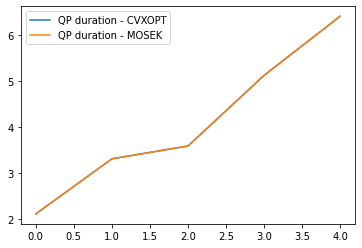

In [62]:
times = solver.times
for method in qp_methods:
    plt.plot(times["QP"][1:], label=f"QP duration - {method}")
plt.legend(loc="upper left")
plt.show()